In [1]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

#### Data Loading
Load n episodes from each channel

In [2]:
n = 50
MOKHBIR_DIR = "./Al_Mokhbir_Al_Eqtisadi/"
DA7EE7_DIR = "./Da7ee7/"
HADARAA_DIR = "./Fi_Al_Hadaraa/"

In [3]:
def data_loader(dir_path:str, n:int, read_metadata:bool=False):
    """
    Load the data from the file and return a pandas dataframe
    :param dir_path: the path to the directory containing the .txt files
    :param n: the number of episodes to read
    :param read_metadata: whether to read the metadata or not
    :return: a pandas dataframe
    """
    episodes_files = []
    episodes_titles = []
    data_dir_path = dir_path + "raw_data"
    for i, file in enumerate(os.listdir(data_dir_path)):
        if i >= n:
            break
        if file.endswith(".txt"):
            with open(os.path.join(data_dir_path, file), 'r') as f:
                episodes_files.append(f.read())
                episodes_titles.append(file)

    if read_metadata:
        metadata_dir_path = dir_path + "metadata"
        episodes_length = []
        for i , file in enumerate(os.listdir(metadata_dir_path)):
            if i >= n:
                break
            if file.endswith(".json"):
                with open(os.path.join(metadata_dir_path, file), 'r') as f:
                    data = json.load(f)
                    episodes_length.append(data['length'])
        df = pd.DataFrame({'episode_transcript': episodes_files, 'title': episodes_titles, 'length': episodes_length})
    else:
        df = pd.DataFrame({'episode_transcript': episodes_files, 'title': episodes_titles})

    return df

In [4]:
mokhbir_df = data_loader(MOKHBIR_DIR, n, read_metadata=True)
da7ee7_df = data_loader(DA7EE7_DIR, n, read_metadata=False)
hadaraa_df = data_loader(HADARAA_DIR, n, read_metadata=True)
mokhbir_df.info(), da7ee7_df.info(), hadaraa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   episode_transcript  50 non-null     object
 1   title               50 non-null     object
 2   length              50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   episode_transcript  50 non-null     object
 1   title               50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   episode_transcript  50 non-null     object
 1   title               50 non-n

(None, None, None)

In [5]:
mokhbir_df.head()


,episode_transcript,title,length
0,ايران واذربيجان بينهم حدود طولها يتجاوز\nال 75...,المخبر_الاقتصادي__ما_علاقة_أمريكا_بالطائرة_الت...,00:16:55
1,قطاع غزه بيتعرض في الاسابيع الاخيره\nلعدوان اج...,المخبر_الاقتصادي__لماذا_دمرت_إسرائيل_مطار_غزة_...,00:16:15
2,الدول الغربية بقيادة الولايات المتحدة\nمستمرة ...,المخبر_الاقتصادي__هل_تنجح_خطة_أمريكا_وأوروبا_ل...,00:17:40
3,في 8 اكتوبر 2023 وبعد يوم واحد من انطلاق\nعملي...,المخبر_الاقتصادي__كيف_استطاع_الأغنياء_اليهود_إ...,00:14:57
4,في 26 يناير سنه 1968 صحيفه انترناشونال\nهيرال ...,المخبر_الاقتصادي__لماذا_يكره_الفرنسيون_الدولار...,00:17:23


#### Correlation between transcript length and actual episode length
- for Mokhbir El Eqtisadi and Fi Al Hadaraa only (no length in Da7ee7 metadata)

In [6]:
def parse_length(length:str):
    """
    Parse the length of the episode from the metadata
    :param length: the length of the episode as a string in the format 'hh:mm:ss'
    :return: the length in seconds
    """
    h, m, s = map(int, length.split(':'))
    return int(h * 3600 + m * 60 + s)

In [7]:
mokhbir_df['length'] = mokhbir_df['length'].apply(parse_length)
hadaraa_df['length'] = hadaraa_df['length'].apply(parse_length)

In [8]:
mokhbir_df['length'].describe(), hadaraa_df['length'].describe()

(count      50.000000
 mean     1047.960000
 std       221.516016
 min       732.000000
 25%       886.500000
 50%      1019.000000
 75%      1152.250000
 max      1637.000000
 Name: length, dtype: float64,
 count      50.000000
 mean     1112.520000
 std       299.615144
 min        58.000000
 25%       940.500000
 50%      1079.000000
 75%      1328.000000
 max      1861.000000
 Name: length, dtype: float64)

In [9]:
# add transcript length to the dataframes word count
mokhbir_df['transcript_length'] = mokhbir_df['episode_transcript'].apply(lambda x: len(x.split()))
hadaraa_df['transcript_length'] = hadaraa_df['episode_transcript'].apply(lambda x: len(x.split()))

mokhbir_df.info(), hadaraa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   episode_transcript  50 non-null     object
 1   title               50 non-null     object
 2   length              50 non-null     int64 
 3   transcript_length   50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   episode_transcript  50 non-null     object
 1   title               50 non-null     object
 2   length              50 non-null     int64 
 3   transcript_length   50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


(None, None)

##### Calculate and plot correlation

Correlation : 0.17606805169458217


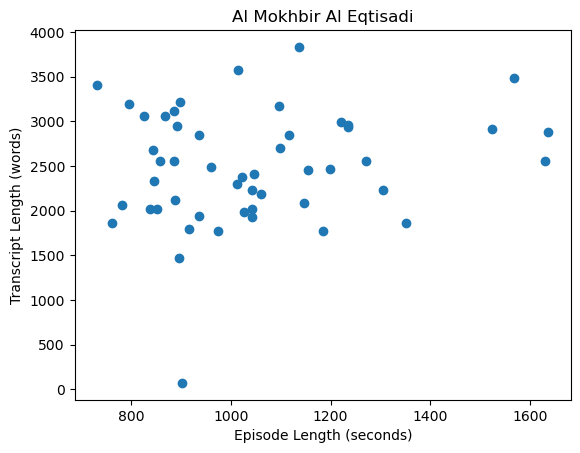

In [10]:
corr = mokhbir_df['length'].corr(mokhbir_df['transcript_length'])
print(f"Correlation : {corr}")

plt.scatter(mokhbir_df['length'], mokhbir_df['transcript_length'])
plt.xlabel('Episode Length (seconds)')
plt.ylabel('Transcript Length (words)')
plt.title('Al Mokhbir Al Eqtisadi')
plt.show()



Correlation : 0.12690299874078606


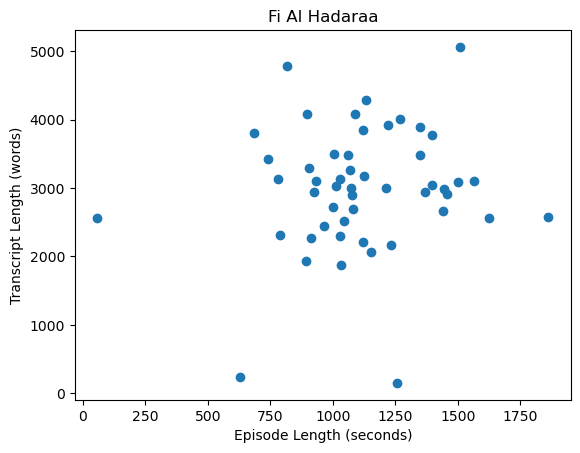

In [11]:
corr = hadaraa_df['length'].corr(hadaraa_df['transcript_length'])
print(f"Correlation : {corr}")

plt.scatter(hadaraa_df['length'], hadaraa_df['transcript_length'])
plt.xlabel('Episode Length (seconds)')
plt.ylabel('Transcript Length (words)')
plt.title('Fi Al Hadaraa')
plt.show()

The weak correlation between the two variables suggests that the presenter's speaking speed is not constant across episodes and it also reflects the nature of speech in general like we can infer that we have lots of pauses.

Another reason could go back to the art direction of the show, where
- The show might depend on visual aids or music which might make the presenter speak less
- The presenter might be speaking slowly to make sure the audience understands the content

#### Clustering sample of episodes based on TF-IDF vectors of the transcript to find if the data is usable for clustering or not
- Visualize the episodes using UMAP (2D and 3D)
- Use KMeans to cluster the data 
- Visualize the clusters

Convert transcripts to TF-IDF vectors

In [12]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))

# Combine Transcripts & Assign Labels
mokhbir_transcripts = mokhbir_df['episode_transcript'].tolist()
hadaraa_transcripts = hadaraa_df['episode_transcript'].tolist()
da7ee7_transcripts = da7ee7_df['episode_transcript'].tolist()

all_transcripts = mokhbir_transcripts + hadaraa_transcripts + da7ee7_transcripts

# Create labels for each channel
labels = (['Mokhbir'] * len(mokhbir_transcripts) +
          ['Hadaraa'] * len(hadaraa_transcripts) +
          ['Da7ee7'] * len(da7ee7_transcripts))

# Convert text to TF-IDF vectors
vectorizer = TfidfVectorizer(stop_words=list(arabic_stopwords))
X_tfidf = vectorizer.fit_transform(all_transcripts)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omarahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/miniconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


Visualize the data in 2D and 3D using UMAP

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


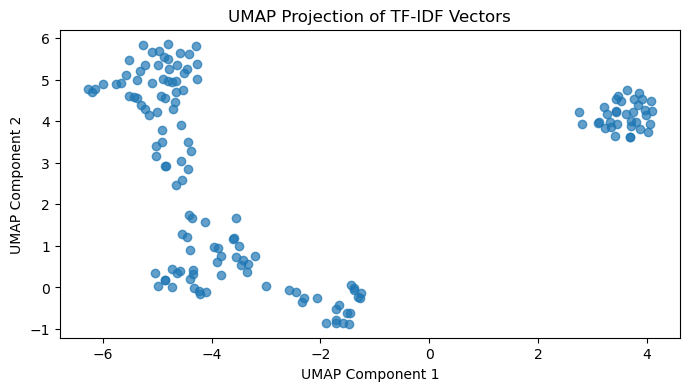

In [13]:
import umap

# Apply UMAP for Dimensionality Reduction
umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X_tfidf.toarray())

# Visualize the transcripts in 2D
plt.figure(figsize=(8,4))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.7)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Projection of TF-IDF Vectors")
plt.show()

Assign a color to each channel to show if clusters are channel-specific or not

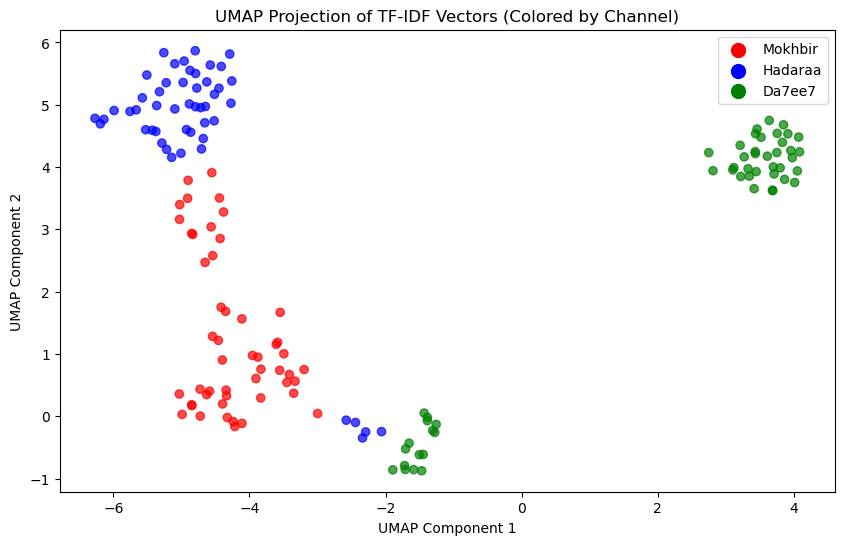

In [14]:
# Assign Colors to Each Channel
channel_colors = {
    'Mokhbir': 'red',
    'Hadaraa': 'blue',
    'Da7ee7': 'green'
}

colors = np.array([channel_colors[label] for label in labels])

# Visualize the transcripts in 2D with colors
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=colors, alpha=0.7)

plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Projection of TF-IDF Vectors (Colored by Channel)")

for channel, color in channel_colors.items():
    plt.scatter([], [], color=color, label=channel, s=100)  # Dummy points for legend

plt.legend()
plt.show()

Visualize the transcripts in 3D using UMAP

In [15]:
# Reduce dimensions using UMAP to 3D
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap = umap_model.fit_transform(X_tfidf.toarray())

/opt/miniconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [16]:
import plotly.graph_objects as go

def plot_3d_vectors(X_umap, labels=None, colors=None, title="3D Vector Representation"):
    """
    Plots a 3D vector representation of data points projected via UMAP.

    Parameters:
        X_umap (ndarray): 2D array of shape (n_samples, 3) containing 3D coordinates.
        labels (list, optional): List of labels corresponding to each data point.
        colors (list, optional): List of colors for each data point. If None, defaults to Plotly's automatic coloring.
        title (str, optional): Title of the plot.

    Returns:
        None: Displays the interactive 3D plot.
    """
    fig = go.Figure()

    # Determine axis scale
    axis_length = np.max(np.abs(X_umap)) * 1.2 

    # Add axis lines (for reference)
    fig.add_trace(go.Scatter3d(x=[-axis_length, axis_length], y=[0, 0], z=[0, 0], mode='lines',
                               line=dict(color='black', width=3), name="X-axis")) 
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[-axis_length, axis_length], z=[0, 0], mode='lines',
                               line=dict(color='black', width=3), name="Y-axis"))  
    fig.add_trace(go.Scatter3d(x=[0, 0], y=[0, 0], z=[-axis_length, axis_length], mode='lines',
                               line=dict(color='black', width=3), name="Z-axis")) 

    # Plot vectors as rays
    for i in range(len(X_umap)):
        label = f"{labels[i]} {i+1}" if labels is not None else f"Vector {i+1}"
        
        fig.add_trace(go.Scatter3d(
            x=[0, X_umap[i, 0]],
            y=[0, X_umap[i, 1]],
            z=[0, X_umap[i, 2]],
            mode='lines+markers',
            marker=dict(size=5, color=colors[i] if colors is not None else None), 
            line=dict(width=3, color=colors[i] if colors is not None else None),
            name=label
        ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis=dict(title="UMAP Dim 1", backgroundcolor="rgb(240, 240, 240)"),
            yaxis=dict(title="UMAP Dim 2", backgroundcolor="rgb(240, 240, 240)"),
            zaxis=dict(title="UMAP Dim 3", backgroundcolor="rgb(240, 240, 240)"),
        ),
        width=900,
        height=700,
        showlegend=True
    )

    fig.show()

In [17]:
plot_3d_vectors(X_umap, labels=labels, colors=None, title="3D UMAP Projection of TF-IDF Vectors")

In [18]:
plot_3d_vectors(X_umap, labels=labels, colors=colors, title="3D UMAP Projection of TF-IDF Vectors (Colored by Channel)")

Apply KMeans clustering to the data

In [25]:
from sklearn.cluster import KMeans
# Apply K-Means Clustering
num_clusters = 3 
kmeans = KMeans(n_clusters=num_clusters, n_init=10)
labels = kmeans.fit_predict(X_umap)

cluster_colors = ['red', 'blue', 'green']
colors = [cluster_colors[label] for label in labels]

In [26]:
plot_3d_vectors(X_umap, labels=labels, colors=colors, title="3D UMAP Projection of TF-IDF Vectors (Clustered by K-Means)")